**Step 1: Importing, merging, and exploring**


In [1]:
#import necessary tools
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#import and read 3 data files from VAERS
df_vax = pd.read_csv("2021VAERSVAX.csv")
df_sx = pd.read_csv("2021VAERSSYMPTOMS.csv")

In [3]:
df_data = pd.read_csv("2021VAERSDATA.csv", engine = "python")

In [4]:
#explore dataset 1
df_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [5]:
#see size of data
df_data.shape

(46163, 35)

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46163 entries, 0 to 46162
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      46163 non-null  int64  
 1   RECVDATE      46163 non-null  object 
 2   STATE         39463 non-null  object 
 3   AGE_YRS       42372 non-null  float64
 4   CAGE_YR       37618 non-null  float64
 5   CAGE_MO       104 non-null    float64
 6   SEX           46163 non-null  object 
 7   RPT_DATE      67 non-null     object 
 8   SYMPTOM_TEXT  46161 non-null  object 
 9   DIED          2240 non-null   object 
 10  DATEDIED      2063 non-null   object 
 11  L_THREAT      1425 non-null   object 
 12  ER_VISIT      11 non-null     object 
 13  HOSPITAL      4906 non-null   object 
 14  HOSPDAYS      3207 non-null   float64
 15  X_STAY        63 non-null     object 
 16  DISABLE       984 non-null    object 
 17  RECOVD        42065 non-null  object 
 18  VAX_DATE      44350 non-nu

In [7]:
#explore dataset 2
df_vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [8]:
#see size of data
df_vax.shape

(46824, 8)

In [9]:
df_vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46824 entries, 0 to 46823
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VAERS_ID         46824 non-null  int64 
 1   VAX_TYPE         46824 non-null  object
 2   VAX_MANU         46824 non-null  object
 3   VAX_LOT          32107 non-null  object
 4   VAX_DOSE_SERIES  46613 non-null  object
 5   VAX_ROUTE        36487 non-null  object
 6   VAX_SITE         36796 non-null  object
 7   VAX_NAME         46824 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.9+ MB


In [10]:
#explore dataset 3
df_sx.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


In [11]:
#see size of data
df_sx.shape

(64356, 11)

In [12]:
df_sx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64356 entries, 0 to 64355
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         64356 non-null  int64  
 1   SYMPTOM1         64356 non-null  object 
 2   SYMPTOMVERSION1  64356 non-null  float64
 3   SYMPTOM2         52740 non-null  object 
 4   SYMPTOMVERSION2  52740 non-null  float64
 5   SYMPTOM3         42165 non-null  object 
 6   SYMPTOMVERSION3  42165 non-null  float64
 7   SYMPTOM4         32536 non-null  object 
 8   SYMPTOMVERSION4  32536 non-null  float64
 9   SYMPTOM5         24424 non-null  object 
 10  SYMPTOMVERSION5  24424 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 5.4+ MB


In [13]:
#merge df_data and df_vax into 1 dataframe, since these contain variables of interest
#dont merge df_sx... we aren't interested in the variables for our analysis
df_final = pd.merge(df_data, df_vax, how = "left", on = "VAERS_ID")

In [14]:
df_final.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,Y,NaN,Pcn and bee venom,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Y,NaN,"""Dairy""",COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,NaN,Y,Shellfish,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom...",COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,NaN,NaN,Na,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [15]:
#check to see columns are correct. should be 42
df_final.shape

(46824, 42)

In [16]:
#check to make sure none of the columns are completely empty
df_final.isnull().sum()

VAERS_ID               0
RECVDATE               0
STATE               6763
AGE_YRS             3819
CAGE_YR             8599
CAGE_MO            46698
SEX                    0
RPT_DATE           46755
SYMPTOM_TEXT           2
DIED               44488
DATEDIED           44675
L_THREAT           45337
ER_VISIT           46813
HOSPITAL           41725
HOSPDAYS           43491
X_STAY             46759
DISABLE            45791
RECOVD              4169
VAX_DATE            1836
ONSET_DATE          2215
NUMDAYS             3520
LAB_DATA           26367
V_ADMINBY              0
V_FUNDBY           46732
OTHER_MEDS         17979
CUR_ILL            23792
HISTORY            15620
PRIOR_VAX          44759
SPLTTYPE           37040
FORM_VERS              0
TODAYS_DATE          280
BIRTH_DEFECT       46767
OFC_VISIT          39294
ER_ED_VISIT        39667
ALLERGIES          19869
VAX_TYPE               0
VAX_MANU               0
VAX_LOT            14717
VAX_DOSE_SERIES      211
VAX_ROUTE          10337


In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46824 entries, 0 to 46823
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         46824 non-null  int64  
 1   RECVDATE         46824 non-null  object 
 2   STATE            40061 non-null  object 
 3   AGE_YRS          43005 non-null  float64
 4   CAGE_YR          38225 non-null  float64
 5   CAGE_MO          126 non-null    float64
 6   SEX              46824 non-null  object 
 7   RPT_DATE         69 non-null     object 
 8   SYMPTOM_TEXT     46822 non-null  object 
 9   DIED             2336 non-null   object 
 10  DATEDIED         2149 non-null   object 
 11  L_THREAT         1487 non-null   object 
 12  ER_VISIT         11 non-null     object 
 13  HOSPITAL         5099 non-null   object 
 14  HOSPDAYS         3333 non-null   float64
 15  X_STAY           65 non-null     object 
 16  DISABLE          1033 non-null   object 
 17  RECOVD      

**Step 2: Research Question and Missing Values**

Research question: 	can we predict if someone will get a covid shot based on age? This research question is meaningful because it can show which ages are most likely to already received the vaccine vs the age that needs covid vaccines. This can help in identifying the age group in need of the vaccine.

for VAX_TYPE: COVID_19 = 1, anything else = 0

Columns of interest: VAX_TYPE, AGE_YRS

In [18]:
#explore AGE_YRS to see the different entries possible 
df_final.groupby(["AGE_YRS"]).agg({"AGE_YRS":"count"})

,AGE_YRS
AGE_YRS,
0.08,2
0.25,1
0.33,12
0.42,1
0.50,1
...,...
103.00,5
104.00,1
105.00,2


In [19]:
#check for missing values
df_final["AGE_YRS"].isnull().sum()

3819

In [20]:
#we have 3819 missing values
#we can replace them with means
df_final["AGE_YRS"].fillna(df_final["AGE_YRS"].mean(), inplace = True)

In [21]:
#check to see no more missing values
df_final["AGE_YRS"].isnull().sum()

0

In [22]:
#put ages into categorical bins
df_final["AGE_YRS"].describe()

count    46824.000000
mean        50.468923
std         17.449880
min          0.080000
25%         37.000000
50%         50.468923
75%         62.000000
max        115.000000
Name: AGE_YRS, dtype: float64

<AxesSubplot:>

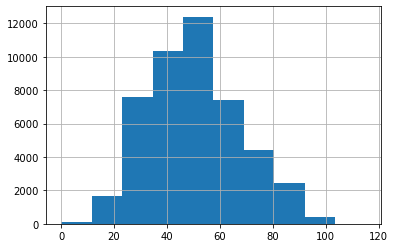

In [23]:
df_final["AGE_YRS"].hist()

In [24]:
#now we can make bins: 0-23, 23-46,46-69,69-92,92-115
df_final["age_buckets"] = pd.cut(df_final.AGE_YRS, [0,23,46,69,92,115], labels=["age_0_23", "age_23_46", "age_46_69", "age_69_92","age_92_115"], include_lowest=True)
df_final[['AGE_YRS','age_buckets']].head()

,AGE_YRS,age_buckets
0,33.0,age_23_46
1,73.0,age_69_92
2,23.0,age_0_23
3,58.0,age_46_69
4,47.0,age_46_69


In [25]:
#now need to make age_buckets into dummies
df_final.groupby(["age_buckets"]).agg({"age_buckets":"count"})

,age_buckets
age_buckets,
age_0_23,1780
age_23_46,17924
age_46_69,19825
age_69_92,6860
age_92_115,435


In [26]:
age_dum = pd.get_dummies(df_final["age_buckets"], prefix = "age")

In [27]:
df_final = pd.concat([df_final,age_dum],axis=1)
df_final.isnull().sum()

VAERS_ID               0
RECVDATE               0
STATE               6763
AGE_YRS                0
CAGE_YR             8599
CAGE_MO            46698
SEX                    0
RPT_DATE           46755
SYMPTOM_TEXT           2
DIED               44488
DATEDIED           44675
L_THREAT           45337
ER_VISIT           46813
HOSPITAL           41725
HOSPDAYS           43491
X_STAY             46759
DISABLE            45791
RECOVD              4169
VAX_DATE            1836
ONSET_DATE          2215
NUMDAYS             3520
LAB_DATA           26367
V_ADMINBY              0
V_FUNDBY           46732
OTHER_MEDS         17979
CUR_ILL            23792
HISTORY            15620
PRIOR_VAX          44759
SPLTTYPE           37040
FORM_VERS              0
TODAYS_DATE          280
BIRTH_DEFECT       46767
OFC_VISIT          39294
ER_ED_VISIT        39667
ALLERGIES          19869
VAX_TYPE               0
VAX_MANU               0
VAX_LOT            14717
VAX_DOSE_SERIES      211
VAX_ROUTE          10337


In [28]:
#explore VAX_TYPE to see the different entries possible
df_final.groupby(["VAX_TYPE"]).agg({"VAX_TYPE":"count"})

,VAX_TYPE
VAX_TYPE,
ANTH,1
CHOL,1
COVID19,46366
DT,2
DTAP,5
DTAPHEPBIP,2
DTAPIPVHIB,3
DTP,1
FLU3,6


In [29]:
#check for missing values
df_final["VAX_TYPE"].isnull().sum()

0

In [30]:
#there are no missing values, but there are "unk", so we will drop those
df_final.drop(df_final.index[df_final["VAX_TYPE"] == "UNK"], inplace = True)

In [31]:
#unk had 96 values. there was a total of 45700 rows, so should be 45604 rows left
df_final["VAX_TYPE"].shape

(46726,)

In [32]:
#then we will categorize into either "COVID19" or "NOT COVID"
df_final.loc[df_final["VAX_TYPE"] == "COVID19", "VAX_TYPE"] = "COVID"
df_final.loc[df_final["VAX_TYPE"] != "COVID", "VAX_TYPE"] = "NOTCOVID"

In [33]:
df_final.groupby(["VAX_TYPE"]).agg({"VAX_TYPE":"count"})

,VAX_TYPE
VAX_TYPE,
COVID,46366
NOTCOVID,360


In [34]:
df_final["vax_dum"]= df_final.VAX_TYPE.map({"COVID":0, "NOTCOVID": 1})
df_final[["VAX_TYPE", "vax_dum"]].head()

,VAX_TYPE,vax_dum
0,COVID,0
1,COVID,0
2,COVID,0
3,COVID,0
4,COVID,0


In [35]:
df_final.isnull().sum()

VAERS_ID               0
RECVDATE               0
STATE               6749
AGE_YRS                0
CAGE_YR             8560
CAGE_MO            46605
SEX                    0
RPT_DATE           46657
SYMPTOM_TEXT           2
DIED               44418
DATEDIED           44600
L_THREAT           45244
ER_VISIT           46715
HOSPITAL           41649
HOSPDAYS           43406
X_STAY             46661
DISABLE            45697
RECOVD              4154
VAX_DATE            1821
ONSET_DATE          2198
NUMDAYS             3498
LAB_DATA           26314
V_ADMINBY              0
V_FUNDBY           46634
OTHER_MEDS         17938
CUR_ILL            23737
HISTORY            15587
PRIOR_VAX          44662
SPLTTYPE           36980
FORM_VERS              0
TODAYS_DATE          280
BIRTH_DEFECT       46669
OFC_VISIT          39208
ER_ED_VISIT        39585
ALLERGIES          19809
VAX_TYPE               0
VAX_MANU               0
VAX_LOT            14642
VAX_DOSE_SERIES      210
VAX_ROUTE          10274


In [36]:
df_final.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,VAX_ROUTE,VAX_SITE,VAX_NAME,age_buckets,age_age_0_23,age_age_23_46,age_age_46_69,age_age_69_92,age_age_92_115,vax_dum
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,IM,LA,COVID19 (COVID19 (MODERNA)),age_23_46,0,1,0,0,0,0
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,IM,RA,COVID19 (COVID19 (MODERNA)),age_69_92,0,0,0,1,0,0
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),age_0_23,1,0,0,0,0,0
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,NaN,NaN,COVID19 (COVID19 (MODERNA)),age_46_69,0,0,1,0,0,0
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,IM,LA,COVID19 (COVID19 (MODERNA)),age_46_69,0,0,1,0,0,0


**Step 3: Classification with Naive Bayes**

Naive Bayes is good for predicting outcomes fast and easily

In [37]:
#import libraries
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

In [38]:
#set X and y
X = df_final[["age_age_0_23","age_age_23_46","age_age_46_69","age_age_69_92","age_age_92_115"]]
y = df_final[["vax_dum"]]


In [39]:
#split x and y 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)

In [40]:
#train with Naive Bayes
nb = GaussianNB()
nb.fit(X_train,y_train)

/Users/laurensnader/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [41]:
y_pred = nb.predict(X_test)
pd.Series(y_pred)

0       0
1       0
2       0
3       0
4       0
       ..
9341    0
9342    0
9343    0
9344    0
9345    0
Length: 9346, dtype: int64

In [42]:
new_var = pd.concat([y_test, pd.Series(y_pred)],axis=1).dropna()
new_var

,vax_dum,0
3,0.0,0.0
10,0.0,0.0
23,0.0,0.0
25,0.0,0.0
39,0.0,0.0
...,...,...
9313,1.0,0.0
9315,0.0,0.0
9320,0.0,1.0
9326,0.0,0.0


In [43]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[8946  323]
 [  67   10]]


In [44]:
confusion = metrics.confusion_matrix(y_test,y_pred)
TN = confusion[0,0]
FP = confusion [0,1]
FN = confusion [1,0]
TP = confusion [1,1]

In [45]:
sensitivity = TP / float(FN+TP)
print(sensitivity)

0.12987012987012986


In [46]:
specificity = TN / (TN + FP)
print(specificity)

0.9651526594023088


In [47]:
precision = TP/float(TP + FP)
print(precision)

0.03003003003003003


In [48]:
#calculate accuracy - % of correct predictions the model can make
print(metrics.accuracy_score(y_test, y_pred))

0.9582709180398031


In [49]:
#AUC
print(metrics.roc_auc_score(y_test, y_pred))

0.5475113946362193


**STEP 4: CONCLUSION:**

AUC = % of ROC plot that is underneath the curve. The higher the value, the better the classifier model is. This model is 95.8% accurate, meaning that 54.7% of the time, it will make a correct prediction. The AUC is 54.7%. This AUC isn't very good.. This means the model can distinguish between true positive and true negatives and detect them more than false positives and false negatives 54.7% of the time.

I think the AUC is low because there is only one predictor (age). If there were more predictors present, the AUC may improve due to the model having more training information to pull from. Due to how low the AUC is, this model would need to be fine tuned, by potentially adding in more predictors.